<a href="https://colab.research.google.com/github/SumaDintyala1207/Aggregg_Server_API/blob/main/AMLAVPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#Loading Dataset

from google.colab import files
uploaded = files.upload_file('exercise_dataset.csv')

data = pd.read_csv('exercise_dataset.csv') # From Kaggle

print(data.head())

# Filling Missing Values
for col in ['Age', 'Actual Weight', 'Heart Rate', 'Calories Burn', 'BMI', 'Duration', 'Exercise Intensity']:
    data[col].fillna(data[col].mean(), inplace=True)

#Feature Extraction
features = data[['Age', 'Actual Weight', 'Heart Rate', 'Calories Burn', 'Duration', 'BMI', 'Exercise Intensity']]
target = data['Dream Weight']

Saved exercise_dataset.csv to /content/exercise_dataset.csv
   ID     Exercise  Calories Burn  Dream Weight  Actual Weight  Age  Gender  \
0   1   Exercise 2     286.959851     91.892531      96.301115   45    Male   
1   2   Exercise 7     343.453036     64.165097      61.104668   25    Male   
2   3   Exercise 4     261.223465     70.846224      71.766724   20    Male   
3   4   Exercise 5     127.183858     79.477008      82.984456   33    Male   
4   5  Exercise 10     416.318374     89.960226      85.643174   29  Female   

   Duration  Heart Rate        BMI Weather Conditions  Exercise Intensity  
0        37         170  29.426275              Rainy                   5  
1        43         142  21.286346              Rainy                   5  
2        20         148  27.899592             Cloudy                   4  
3        39         170  33.729552              Sunny                  10  
4        34         118  23.286113             Cloudy                   3  


<ipython-input-18-6d1e534d0f5a>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


In [19]:
#Deriving Basic Workout Efficiency
data['Workout Efficiency'] = data['Calories Burn'] / data['Duration']

#Deriving Intensity-Normalized Efficiency
data['Workout Efficiency Per Heart Rate'] = data['Calories Burn'] / data['Heart Rate']

#Displaying Results
data[['Calories Burn', 'Duration', 'Workout Efficiency', 'Workout Efficiency Per Heart Rate',]].head()


,Calories Burn,Duration,Workout Efficiency,Workout Efficiency Per Heart Rate
0,286.959851,37,7.755672,1.687999
1,343.453036,43,7.987280,2.418683
2,261.223465,20,13.061173,1.765023
3,127.183858,39,3.261125,0.748140
4,416.318374,34,12.244658,3.528122


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Calories Burn'].plot(kind='hist', bins=20, title='Calories Burn')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Duration'].plot(kind='hist', bins=20, title='Duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Workout Efficiency'].plot(kind='hist', bins=20, title='Workout Efficiency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='Calories Burn', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Calories Burn', y='Duration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Duration', y='Workout Efficiency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Workout Efficiency', y='Workout Efficiency Per Heart Rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Calories Burn']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Calories Burn')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Duration']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Duration')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Workout Efficiency']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Workout Efficiency')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Workout Efficiency Per Heart Rate']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Workout Efficiency Per Heart Rate')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Calories Burn'].plot(kind='line', figsize=(8, 4), title='Calories Burn')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Duration'].plot(kind='line', figsize=(8, 4), title='Duration')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Workout Efficiency'].plot(kind='line', figsize=(8, 4), title='Workout Efficiency')
plt.gca().spines[['top', 'right']].set_visible(False)

In [26]:
data[['Calories Burn', 'Duration', 'Workout Efficiency', 'Workout Efficiency Per Heart Rate',]].head()
scaler = StandardScaler()
features = data[['Age', 'Actual Weight', 'Heart Rate', 'Calories Burn', 'Duration', 'BMI', 'Exercise Intensity', 'Workout Efficiency', 'Workout Efficiency Per Heart Rate']].astype(float)
scaled_features = scaler.fit_transform(features)

#Updating with new features
features = data[['Age', 'Actual Weight', 'Heart Rate', 'Calories Burn', 'Duration', 'BMI', 'Exercise Intensity', 'Workout Efficiency', 'Workout Efficiency Per Heart Rate']]

Mean Squared Error: 8.241093359049627


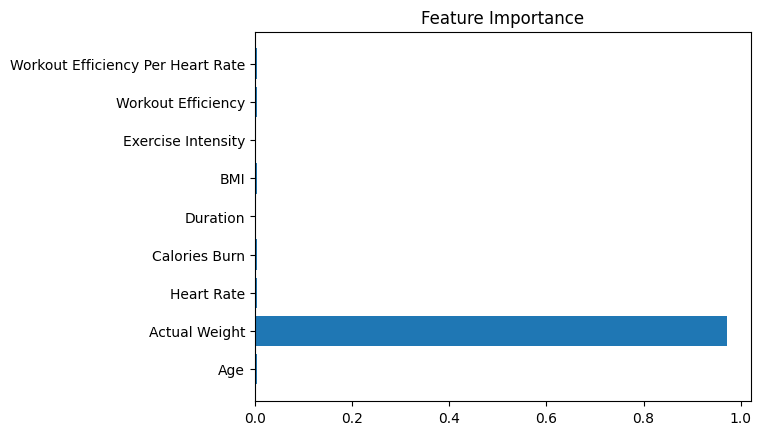

In [28]:
#Splitting Data for training and testing
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

#Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#Predicting Dream Weight
y_pred = model.predict(X_test)

#Evaluating
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

#Plotting Feature Importance
importances = model.feature_importances_
plt.barh(features.columns, importances)
plt.title('Feature Importance')
plt.show()

In [29]:
#Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
user_clusters = kmeans.fit_predict(features)

#Adding cluster labels to original data
data['user_cluster'] = user_clusters

def recommend_workout(user_cluster):
  if user_cluster == 0:
    return 'High Intensity Interval Training (HIIT)'
  elif user_cluster == 1:
    return 'Moderaate Cardio'
  else:
    return 'Low Intensity Yoga or Walking'

for index, row in data.iloc[:10].iterrows():
  print(f"User {index} is in cluster {row['user_cluster']} and should do: {recommend_workout(row['user_cluster'])}")


User 0 is in cluster 2 and should do: Low Intensity Yoga or Walking
User 1 is in cluster 2 and should do: Low Intensity Yoga or Walking
User 2 is in cluster 2 and should do: Low Intensity Yoga or Walking
User 3 is in cluster 1 and should do: Moderaate Cardio
User 4 is in cluster 0 and should do: High Intensity Interval Training (HIIT)
User 5 is in cluster 0 and should do: High Intensity Interval Training (HIIT)
User 6 is in cluster 0 and should do: High Intensity Interval Training (HIIT)
User 7 is in cluster 2 and should do: Low Intensity Yoga or Walking
User 8 is in cluster 1 and should do: Moderaate Cardio
User 9 is in cluster 2 and should do: Low Intensity Yoga or Walking


In [31]:
class QLearningAgent:
  def __init__(self, n_actions, n_states, alpha=0.1, gamma=0.9, epsilon=0.1):
    self.q_table = np.zeros((n_states, n_actions))
    self.alpha = alpha
    self.gamma = gamma
    self.epsilon = epsilon

  def choose_action(self, stable):
    if np.random.uniform(0,1) < self.epsilon:
      return np.random.choice(n_actions)
    else:
      return np.argmax(self.q_table[state])

  def update_q_table(self, state, action, reward, next_state):
    predict = self.q_table[state, action]
    target = reward + self.gamma * np.max(self.q_table[next_state])
    self.q_table[state, action] += self.alpha * (target - predict)

n_states = 100
n_actions = 3
agent = QLearningAgent(n_actions, n_states)

for episode in range(100):
  state = np.random.randint(0, n_states)
  action = agent.choose_action(state)
  reward = np.random.uniform(-1, 1)
  next_state = (state + action) % n_states
  agent.update_q_table(state, action, reward, next_state)